In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
import cv2

Get metadata from csv file...

In [2]:
from collections import OrderedDict
import numpy as np
import matplotlib as plt

ids = []
targets = OrderedDict()
with open('labels.csv') as f:
    header = f.readline()
    for line in f:
        idzone, label = line.split(',')
        sampleid, zone = idzone.split('_')
        zone_number = zone[len('Zone'):] # string looks like "Zone8" so this chops off "Zone"
        zone_number = int(zone_number)
        
        if sampleid not in targets:
            ids.append(sampleid)
            targets[sampleid] = np.zeros(18)
        targets[sampleid][zone_number] = float(label)

Create our (giant...) matrices for training. Takes up roughly 12 GB of system memory (thankfully mine as 32)

In [144]:
X_train = [] # training data
Y_train = [] # training targets

i = 0
n = 50 # len(ids)
for sid in ids:
    path = 'data/{}.aps.npz'.format(sid)

    npzfile = np.load(path)
    data = npzfile['arr_0']
    X_train.append(data)
    Y_train.append(targets[sid])
    
    i += 1
    print (i, "of", n, end="\r")
    if i > n:
        break

X_train = np.moveaxis(X_train, 3, 1)
print (np.shape(X_train[0]))

(16, 512, 660)


For some reason the perspective is the last axis in the matrix, move it to be the second matrix so it's more logical (doesn't actually make a difference from a training perspective)

X_train should now be in the form [sampleIndex, perspective, x, y]

Also, moveaxis somehow does this operation while using zero extra memory, no idea how but clearly whoever made it had a better professor for algorithms than Gelfond

Print matrix...

In [79]:
print (X_train[0][3]) # first sample from the 4th perspective
print (Y_train[0])

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


Show Image...

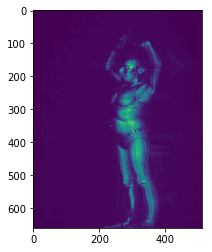

In [105]:
from matplotlib.pyplot import imshow 
figsize(16,4)
im = imshow(np.flipud(X_train[22,3,:,:], cmap = 'viridis') # 1st sample, 4th perspective

(51, 16, 512, 660)


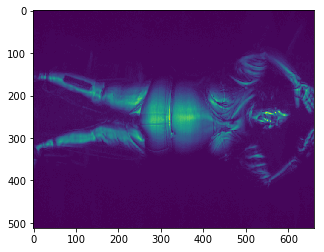

In [195]:
shape = np.shape(X_train)
print(shape)
i = 0
j = 0
for i in range(shape[0]):
    for j in range(shape[1]):
        img = (X_train[i,j,:,:])
#         cv2.imwrite("img.jpg", img)
#         img = cv2.imread("img.jpg")
#         print(np.shape(img))
        base = img[0,0]
        first = False
        for k in reversed(range(shape[2])):
            if(first):
                break
            for l in reversed(range(shape[3])):
                if(first):
                    break
#                 print(type(img[k,l,:]), type(base))
                if(not np.array_equal(img[k,l], base)):
                    img = img[:,:l]
#                     imshow(img)
#                     print(np.shape(img))
                    img = cv2.resize(img, (shape[3],shape[2]))
#                     img = np.rot90(img)
#                     print(np.shape(img))
                    imshow(img)
#                     cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                    X_train[i,j,:, :] = img
                    first = True

    print ("Passenger ", i, " Image ", j, " is Cropped", end="\r")

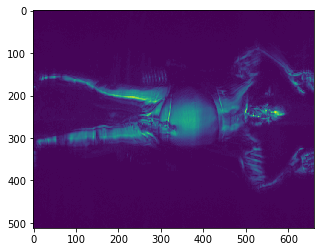

In [201]:
imshow(X_train[31,15,:,:])